In [76]:
import pandas as pd

In [78]:
csv_file_path = "data_set/all_stocks_5yr.csv" 
stock_data =  pd.read_csv(csv_file_path) 
print(stock_data.head())

         Date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [80]:
#Data Exploration


In [82]:
stock_data.isnull().sum()

Date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [84]:
stock_data.fillna('')

Date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]

In [86]:
stock_data = stock_data.dropna()  

In [88]:
#Cleanning

In [90]:
print(stock_data.columns)  

if 'Date' in stock_data.columns:
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
else:
    print("Column 'Date' does not exist in the DataFrame.")

Index(['Date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


In [92]:
# Save the updated DataFrame to a new CSV file
stock_data.to_csv(csv_file_path, index=False)


In [94]:
#Now do this one more!
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

if 'Date' in stock_data.columns:
    print("Success!")
else:
    print("Column 'Date' does not exist in the DataFrame.")

Success!


In [96]:
stock_data.columns = ['Date', 'Open', 'Close', 'High', 'Low', 'Volume','Name']


In [98]:
print("Updated column names:", stock_data.columns)


Updated column names: Index(['Date', 'Open', 'Close', 'High', 'Low', 'Volume', 'Name'], dtype='object')


In [100]:
#Data Analysis

In [102]:
print(stock_data.describe())
stock_data['Date'] = pd.to_datetime(stock_data['Date'])


                                Date           Open          Close  \
count                         619040  619040.000000  619040.000000   
mean   2015-08-18 00:48:23.494443264      83.023831      83.778918   
min              2013-02-08 00:00:00       1.620000       1.690000   
25%              2014-05-20 00:00:00      40.220000      40.620000   
50%              2015-08-21 00:00:00      62.590000      63.150000   
75%              2016-11-15 00:00:00      94.370000      95.180000   
max              2018-02-07 00:00:00    2044.000000    2067.990000   
std                              NaN      97.379721      98.208681   

                High            Low        Volume  
count  619040.000000  619040.000000  6.190400e+05  
mean       82.256670      83.043763  4.321823e+06  
min         1.500000       1.590000  0.000000e+00  
25%        39.830000      40.245000  1.070320e+06  
50%        62.020000      62.620000  2.082094e+06  
75%        93.540000      94.410000  4.284509e+06  
max  

In [104]:
stock_data['Moving_Avg'] = stock_data['Close'].rolling(window=20).mean()


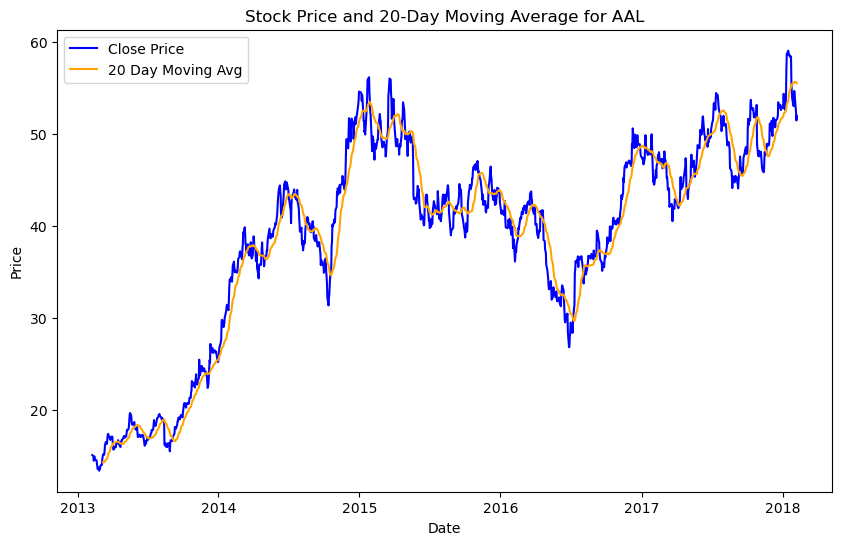

In [140]:
company_name = 'AAL'
company_data = stock_data[stock_data['Name'] == company_name]

plt.figure(figsize=(10, 6))
plt.plot(company_data['Date'], company_data['Close'], label='Close Price', color='blue')
plt.plot(company_data['Date'], company_data['Moving_Avg'], label='20 Day Moving Avg', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Stock Price and 20-Day Moving Average for {company_name}')
plt.legend()
plt.show()

In [138]:
print(company_data.head())


           Date     Open    Close     High      Low     Volume  Name  \
1259 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1260 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
1261 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
1262 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
1263 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

      Moving_Avg  
1259   56.261070  
1260   56.874925  
1261   57.383995  
1262   57.813135  
1263   58.252990  


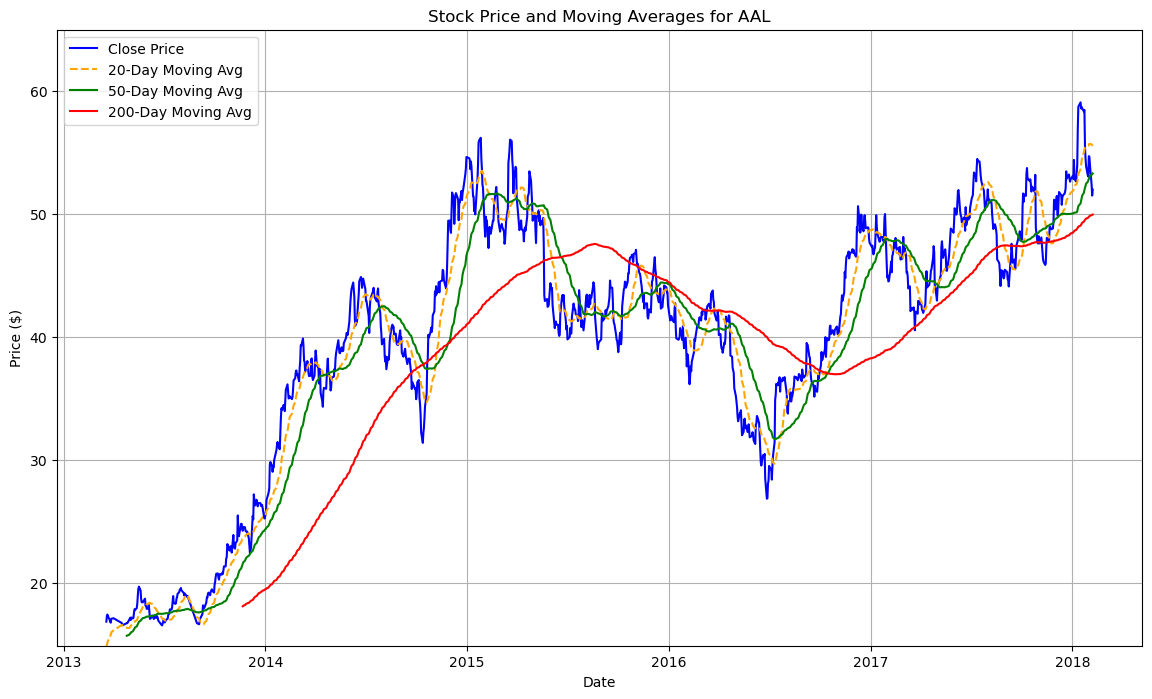

In [142]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'stock_data' is your DataFrame that has been previously loaded

# Select company
company_name = 'AAL'

# Filter data for the specified company
company_data = stock_data[stock_data['Name'] == company_name].copy()

# Convert 'Date' to datetime format and sort by date
company_data['Date'] = pd.to_datetime(company_data['Date'], errors='coerce')
company_data.sort_values(by='Date', inplace=True)

# Remove rows with NaN values in 'Close' or 'Date'
company_data.dropna(subset=['Date', 'Close'], inplace=True)

# Fill missing values in 'Close' by forward fill (or another method as needed)
company_data['Close'].dropna()  

# Calculate moving averages with error handling for insufficient data
def calculate_moving_average(data, window):
    if len(data) >= window:
        return data.rolling(window=window).mean()
    else:
        # If not enough data points, return NaN to avoid false trends
        return pd.Series([None] * len(data))

company_data['20_MA'] = calculate_moving_average(company_data['Close'], 20)
company_data['50_MA'] = calculate_moving_average(company_data['Close'], 50)
company_data['200_MA'] = calculate_moving_average(company_data['Close'], 200)

# Handle potential outliers using Z-score or IQR method
Q1 = company_data['Close'].quantile(0.25)
Q3 = company_data['Close'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR

# Filtering out extreme outliers
filtered_data = company_data[
    (company_data['Close'] >= Q1 - outlier_threshold) & 
    (company_data['Close'] <= Q3 + outlier_threshold)
]

# Plotting the trends
plt.figure(figsize=(14, 8))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Close Price', color='blue', linewidth=1.5)
plt.plot(filtered_data['Date'], filtered_data['20_MA'], label='20-Day Moving Avg', color='orange', linestyle='--')
plt.plot(filtered_data['Date'], filtered_data['50_MA'], label='50-Day Moving Avg', color='green')
plt.plot(filtered_data['Date'], filtered_data['200_MA'], label='200-Day Moving Avg', color='red')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title(f'Stock Price and Moving Averages for {company_name}')
plt.legend()
plt.grid(True)

# Optional: Adjust y-axis to avoid zooming out too much
plt.ylim(filtered_data['Close'].min() * 0.9, filtered_data['Close'].max() * 1.1)

plt.show()


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = stock_data[['Open', 'High', 'Low', 'Volume']]
y = stock_data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(predictions[:10])  


[781.21724177 102.69783212  83.17722519  88.41955409 142.2022152
 156.73702858 178.61073357  26.6926668   72.61220668  42.51769858]
